<a href="https://colab.research.google.com/github/CaioPassos3/AprendizagemDeMaquina/blob/main/Lista5AprendizagemDeMaquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [9]:
df = pd.read_csv('/content/californiabin.csv')

Questão 1.

Considere o conjunto de dados disponível em californiabin.csv, organizado
em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a
saída. Os 8 atributos são usados na predição de preços de casas em distritos
da Califórnia na década de 1990. A saída é binária: 0, para abaixo da mediana
dos preços; 1, para acima da mediana dos preços. Maiores detalhes sobre os dados
podem ser conferidos em https://scikit-learn.org/stable/datasets/
real_world.html#california-housing-dataset.

a) Considerando uma divisão de 80% dos padrões para treinamento e 20%
para teste, avalie modelos de classificação binária nos dados em questão.
Para tanto, use as abordagens abaixo:

– SVM: Escolha um kernel RBF e use grid-search para ajustar os hiperparâmetros
C (valores 2−5, 2−3, 2−1, . . . , 211, 213, 215) e γ (valores
2−15, 2−13, 2−11, . . . , 21, 22, 23).

– Random Forest: Use grid-search para ajustar o número de classificadores
base (valores 10, 20, . . ., 180, 190, 200) e a máxima profundidade
(max depth, valores 4, 6, 8, 10 ou máxima (None no sklearn)).

In [10]:
df = pd.read_csv('/content/californiabin.csv')

# Separação entre atributos e rótulo
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divisão 80% treino + validação / 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Definição da grade de hiperparâmetros
param_grid_svm = {
    'C': [2**i for i in range(-5, 16, 2)],
    'gamma': [2**i for i in range(-15, 4, 2)]
}

# Grid Search com validação cruzada 10-fold
grid_svm = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid_svm, cv=10, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params_svm = grid_svm.best_params_

# Re-treinamento com os melhores parâmetros
final_svm = SVC(kernel='rbf', C=best_params_svm['C'], gamma=best_params_svm['gamma'])
final_svm.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred_svm = final_svm.predict(X_test)

# Resultados
print("Melhor SVM (RBF):", best_params_svm)
print("Acurácia SVM:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Melhor SVM (RBF): {'C': 8192, 'gamma': 3.0517578125e-05}
Acurácia SVM: 0.785
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       212
         1.0       0.77      0.78      0.77       188

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [12]:
# Definição da grade de hiperparâmetros
param_grid_rf = {
    'n_estimators': [10, 20, 100, 180, 190, 200],
    'max_depth': [4, 6, 8, 10]
}

# Grid Search com validação cruzada 10-fold
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=10, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params_rf = grid_rf.best_params_

# Re-treinamento com os melhores parâmetros
final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred_rf = final_rf.predict(X_test)

# Resultados
print("Melhor Random Forest:", best_params_rf)
print("Acurácia RF:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Melhor Random Forest: {'max_depth': 10, 'n_estimators': 190}
Acurácia RF: 0.8275
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       212
         1.0       0.81      0.82      0.82       188

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



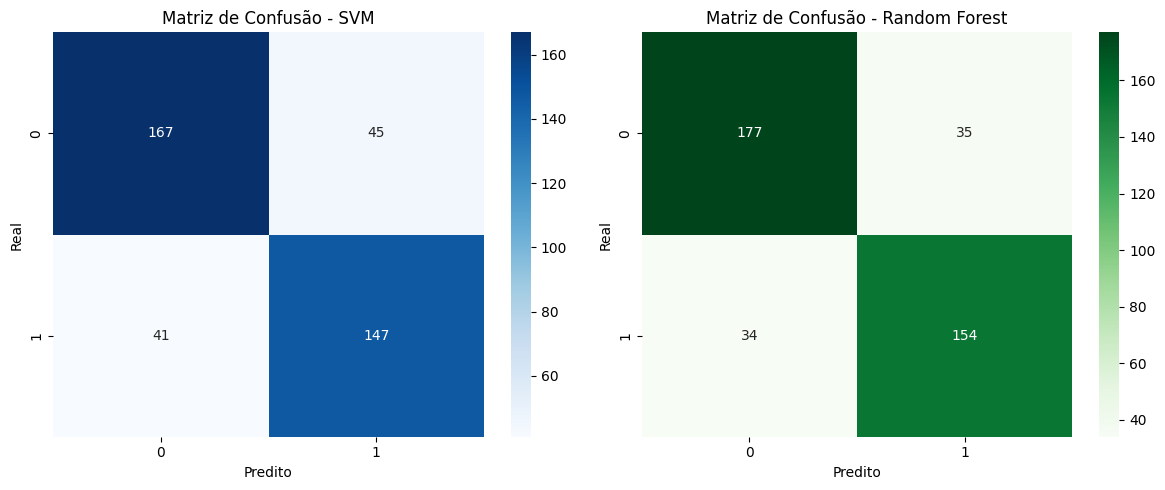

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - SVM')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Matriz de confusão Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

b) Para cada modelo campeão, reporte os hiperparâmetros selecionados e
as métricas de acurácia, revocação, precisão e F1-score nos dados
de teste. Plote também a curva ROC e a curva Precision-Recall,
reportando as áreas sob as curvas, i.e., AUROC e AUPRC.

In [15]:
# Função para imprimir métricas
def imprimir_metricas(nome, y_true, y_pred):
    print(f"=== {nome} ===")
    print("Acurácia :", accuracy_score(y_true, y_pred))
    print("Revocação:", recall_score(y_true, y_pred))
    print("Precisão :", precision_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print()

imprimir_metricas("SVM", y_test, y_pred_svm)
imprimir_metricas("Random Forest", y_test, y_pred_rf)

=== SVM ===
Acurácia : 0.785
Revocação: 0.7819148936170213
Precisão : 0.765625
F1-Score : 0.7736842105263158

=== Random Forest ===
Acurácia : 0.8275
Revocação: 0.8191489361702128
Precisão : 0.8148148148148148
F1-Score : 0.8169761273209549



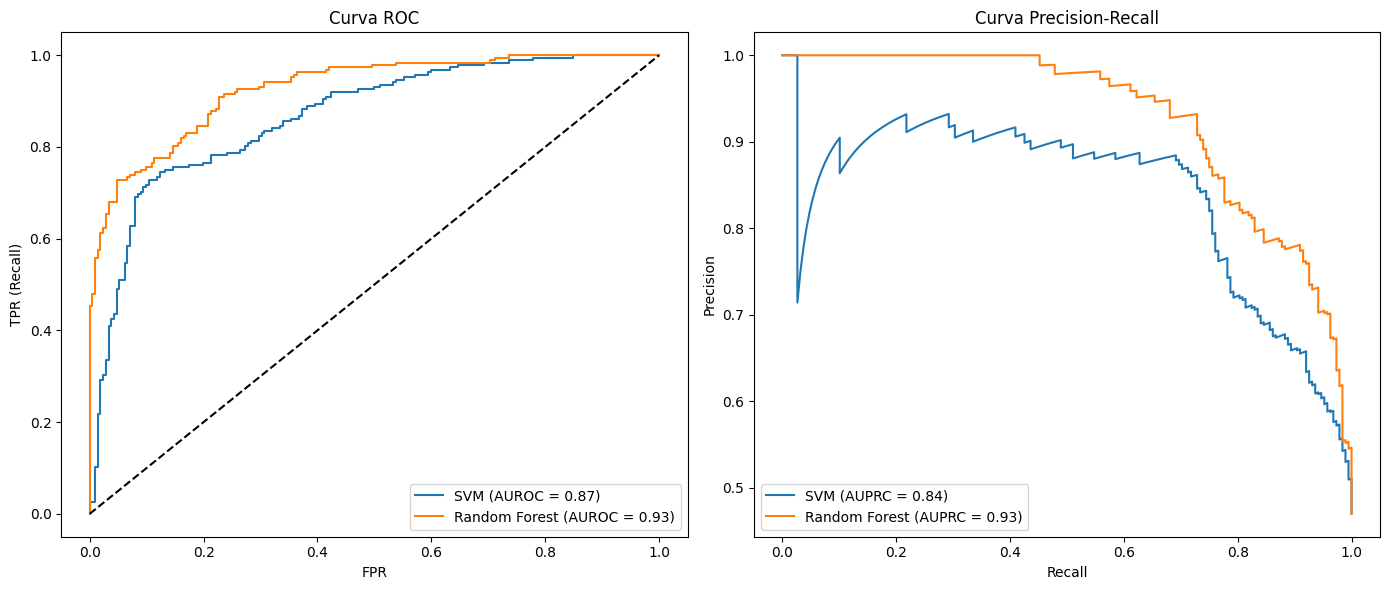

In [17]:
# Probabilidades para curvas
y_score_svm = final_svm.decision_function(X_test)
y_score_rf = final_rf.predict_proba(X_test)[:, 1]

# ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Precision-Recall
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_score_svm)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_score_rf)

prc_auc_svm = auc(rec_svm, prec_svm)
prc_auc_rf = auc(rec_rf, prec_rf)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC
axes[0].plot(fpr_svm, tpr_svm, label=f'SVM (AUROC = {roc_auc_svm:.2f})')
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {roc_auc_rf:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title("Curva ROC")
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR (Recall)")
axes[0].legend()

# Precision-Recall
axes[1].plot(rec_svm, prec_svm, label=f'SVM (AUPRC = {prc_auc_svm:.2f})')
axes[1].plot(rec_rf, prec_rf, label=f'Random Forest (AUPRC = {prc_auc_rf:.2f})')
axes[1].set_title("Curva Precision-Recall")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend()

plt.tight_layout()
plt.show()